,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000


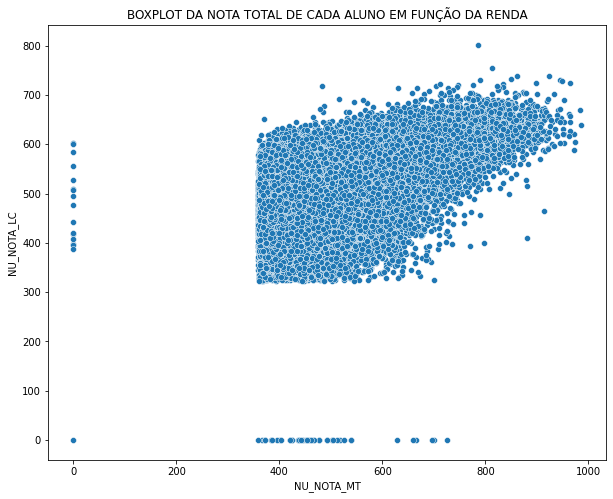

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


fonte= "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados= pd.read_csv(fonte)
#dados.query("NU_IDADE == 13 ") # dados das pessoas com idade igual a 13 anos 
#dados.query("NU_IDADE <= 14 ")["SG_UF_RESIDENCIA"]# mostra os estados de cada idade
#dados.query("NU_IDADE <= 14 ")["SG_UF_RESIDENCIA"].value_counts() # a quantidade de pessoas com menos ou igual a 14 anos que em cada estado (alunos por estado)
#dados.query("NU_IDADE <= 14 ")["SG_UF_RESIDENCIA"].value_counts(normalize=True) # a proporção da participação de cada estados com os inscritos com 14 anos ou menos
alunos_menor_que_quatorze = dados.query("NU_IDADE <= 14 ") 
#alunos_menor_que_quatorze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(10,8)) # gráfico de pizza com o numero de pessoas com 14 ou menos em cada estado
#alunos_menor_que_quatorze["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10,8)) #gráfico de barra com o numero de pessoas com 14 ou menos em cada estado
#len(alunos_menor_que_quatorze) #quantidade de alunos na amostra de dados que tem menos ou 14 anos 
#plt.figure(figsize=(10,8)) # aumentou o tamanho do gráfico

#plt.title("BOXPLOT DAS NOTAS DE MATEMÁTICA EM FUNÇÃO DA RENDA") #adiciona um titulo ao grafico
renda_ordenada= dados["Q006"].unique()
renda_ordenada.sort()
#sns.boxplot(x= "Q006", y="NU_NOTA_REDACAO", data= dados, order = renda_ordenada) #passar parametro de cada eixo e no final de onde está tirando os dados
provas = ["NU_NOTA_CN","NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO" ]
#dados[provas].sum(axis=1) # ou seja faz a soma de todas as notas de cada inscrito e não da matéria como um todo
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
#plt.figure(figsize=(10,8))
#plt.title("BOXPLOT DA NOTA TOTAL DE CADA ALUNO EM FUNÇÃO DA RENDA") #adiciona um titulo ao grafico
#sns.boxplot(x= "Q006", y="NU_NOTA_TOTAL", data= dados, order = renda_ordenada)
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL!=0")
#dados_sem_notas_zero.head()
plt.figure(figsize=(10,8))
plt.title("BOXPLOT DA NOTA TOTAL DE CADA ALUNO EM FUNÇÃO DA RENDA") #adiciona um titulo ao grafico
#sns.boxplot(x= "Q006", y="NU_NOTA_TOTAL", data= dados_sem_notas_zero, hue="IN_TREINEIRO", order = renda_ordenada) #dados tanto em relação a renda como  se a pessoa é treiniera ou não 
#sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL",hue ="Q025", kde= True)
#sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL",hue ="Q025", kde= True, stat="density", cumulative=True) #analisar o topo das curvas 
sns.scatterplot(data = dados_sem_notas_zero, x="NU_NOTA_MT",y="NU_NOTA_LC") # (grafico com pontinhos)COMPARADNO AS NOTAS ENTRE LINGUAGENS E CODICOS E MATEMATICA CRIOU UM PONTO PRA CADA PESSOA QUE TIROU 0 EM MTM E 0 EM LINGUAGUENS E CÓDIGOS
correlacao= dados_sem_notas_zero[provas].corr() # acorrelacao de cada materia entre si . vai de -1 0 +1 quando tem 1 tem total de correlação
correlacao
#sns.heatmap(correlacao, cmap="Blues", annot= True)#mapa de calor referente a correlação das materias  //// annot são com a numeração junto com a cor